In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
IRIS = load_iris()

In [3]:
names = [(name
  .replace(" ", "")
  .replace("(cm)", "")) for name in IRIS.feature_names]

In [4]:
df = pd.DataFrame(IRIS.data)
df.columns = names
df['label'] = IRIS.target
df.label = df.label.astype('category')
df = pd.get_dummies(df)
df = df.sample(df.shape[0])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


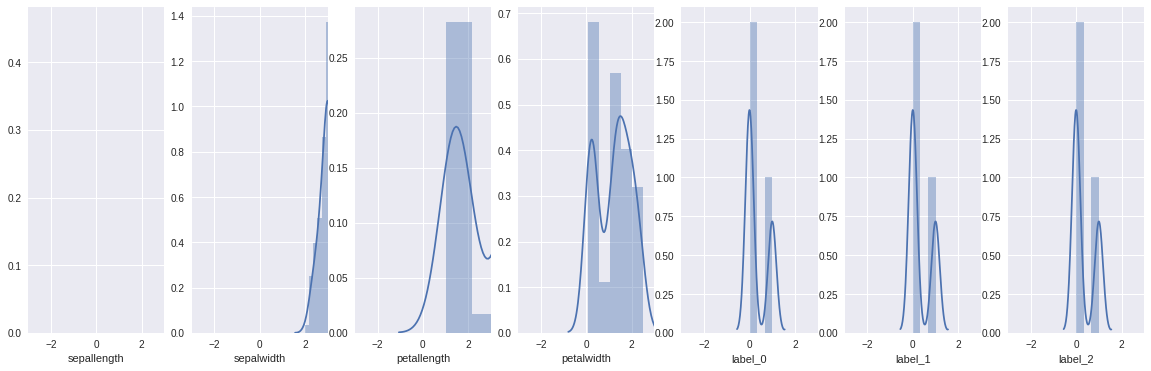

In [5]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(df.columns):
    fig.add_subplot(1,7,1+i)
    sns.distplot(df[col])
    plt.xlim(-3,3)

In [6]:
def gelman_scale(series):
    return (series - series.mean())/(2*series.std())

def standard_scale(series):
    return (series - series.mean())/(series.std())

df_gelman = df.copy()
df_standard = df.copy()

df_gelman.sepallength = gelman_scale(df.sepallength)
df_gelman.sepalwidth = gelman_scale(df.sepalwidth)
df_gelman.petallength = gelman_scale(df.petallength)
df_gelman.petalwidth = gelman_scale(df.petalwidth)
df_standard.sepallength = standard_scale(df.sepallength)
df_standard.sepalwidth = standard_scale(df.sepalwidth)
df_standard.petallength = standard_scale(df.petallength)
df_standard.petalwidth = standard_scale(df.petalwidth)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


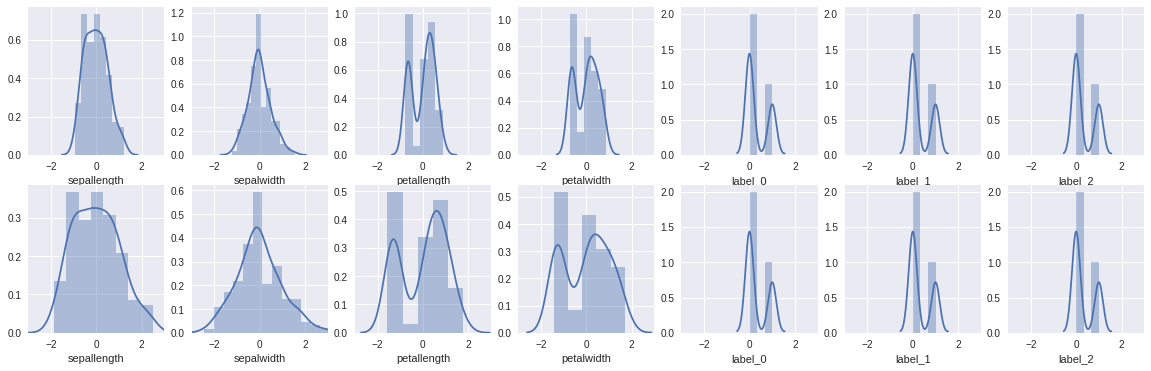

In [7]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(df.columns):
    fig.add_subplot(2,7,1+i)
    sns.distplot(df_gelman[col])
    plt.xlim(-3,3)
    fig.add_subplot(2,7,8+i)
    sns.distplot(df_standard[col])
    plt.xlim(-3,3)

In [27]:
df_standard.label_0.var()

0.2237136465324385

In [33]:
4*np.array((1,1,1,0,0,0,0,0,0,0)).var()

0.83999999999999986

In [9]:
df_standard.cov()

,sepallength,sepalwidth,petallength,petalwidth,label_0,label_1,label_2
sepallength,1.000000,-0.109369,0.871754,0.817954,-0.339326,0.037553,0.301773
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544,0.281710,-0.219795,-0.061914
petallength,0.871754,-0.420516,1.000000,0.962757,-0.436417,0.095347,0.341069
petalwidth,0.817954,-0.356544,0.962757,1.000000,-0.419778,0.055990,0.363788
label_0,-0.339326,0.281710,-0.436417,-0.419778,0.223714,-0.111857,-0.111857
label_1,0.037553,-0.219795,0.095347,0.055990,-0.111857,0.223714,-0.111857
label_2,0.301773,-0.061914,0.341069,0.363788,-0.111857,-0.111857,0.223714


In [22]:
df_gel_cov = 4*df_gelman.cov()

In [23]:
import numpy as np

In [24]:
np.linalg.eig(df_gel_cov)[1].T

array([[  4.19463600e-01,  -2.34077150e-01,   4.84251903e-01,
          4.73556647e-01,  -4.33811005e-01,   9.81317889e-02,
          3.35679216e-01],
       [ -1.76325847e-01,  -4.94614175e-01,  -2.40420587e-02,
         -8.94240484e-02,  -2.25158284e-01,   6.78108519e-01,
         -4.52950236e-01],
       [ -4.31256618e-01,  -7.25114012e-01,  -6.87357766e-02,
         -2.78206820e-02,   4.78638446e-02,  -3.97624563e-01,
          3.49760719e-01],
       [ -7.37013502e-01,   3.87915077e-01,   2.43555871e-02,
          4.26543846e-01,  -2.87262504e-01,   1.46834714e-01,
          1.40427790e-01],
       [ -2.44466679e-01,   2.48553168e-02,   8.61037215e-01,
         -1.66070466e-01,   3.25912923e-01,  -8.77071406e-02,
         -2.38205783e-01],
       [  6.34377955e-02,  -1.53878138e-01,  -1.34978467e-01,
          7.46628689e-01,   4.86568082e-01,  -9.92339950e-02,
         -3.87334087e-01],
       [ -2.57983695e-14,   6.59835260e-15,   8.04677688e-14,
         -2.76991838e-14,   5.77

In [25]:
pca_gelman.components_

array([[  4.19463600e-01,  -2.34077150e-01,   4.84251903e-01,
          4.73556647e-01,  -4.33811005e-01,   9.81317889e-02,
          3.35679216e-01],
       [ -1.76325847e-01,  -4.94614175e-01,  -2.40420587e-02,
         -8.94240484e-02,  -2.25158284e-01,   6.78108519e-01,
         -4.52950236e-01],
       [ -4.31256618e-01,  -7.25114012e-01,  -6.87357766e-02,
         -2.78206820e-02,   4.78638446e-02,  -3.97624563e-01,
          3.49760719e-01],
       [  7.37013502e-01,  -3.87915077e-01,  -2.43555871e-02,
         -4.26543846e-01,   2.87262504e-01,  -1.46834714e-01,
         -1.40427790e-01],
       [ -6.34377955e-02,   1.53878138e-01,   1.34978467e-01,
         -7.46628689e-01,  -4.86568082e-01,   9.92339950e-02,
          3.87334087e-01],
       [  2.44466679e-01,  -2.48553168e-02,  -8.61037215e-01,
          1.66070466e-01,  -3.25912923e-01,   8.77071406e-02,
          2.38205783e-01],
       [  3.38826772e-16,  -2.54585542e-16,  -7.17721326e-17,
          2.18798684e-16,   5.77

In [14]:
from sklearn.decomposition import PCA

In [15]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

def pca_results(dataframe, pca):


    dimensions = dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = dataframe.columns)
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar', colormap=cm.viridis);
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [16]:
pca_gelman = PCA()
pca_standard = PCA()
pca_numerical = PCA()
pca_gelman.fit(df_gelman)
pca_numerical.fit(df_standard)
pca_standard.fit(df_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

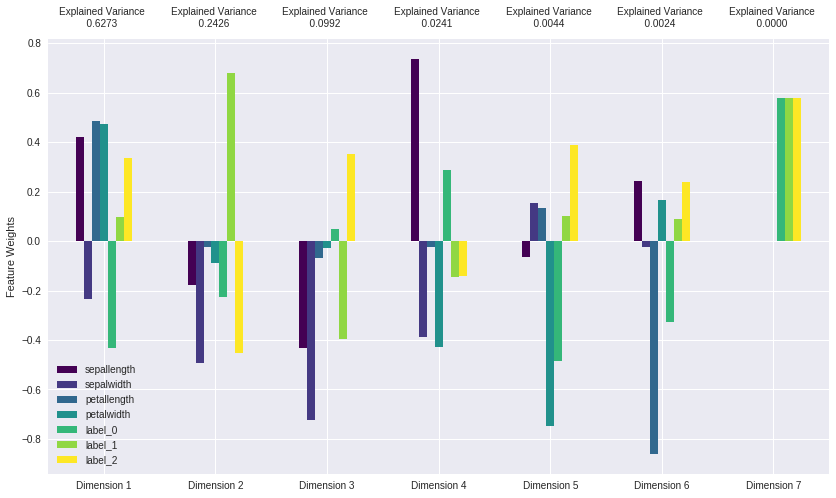

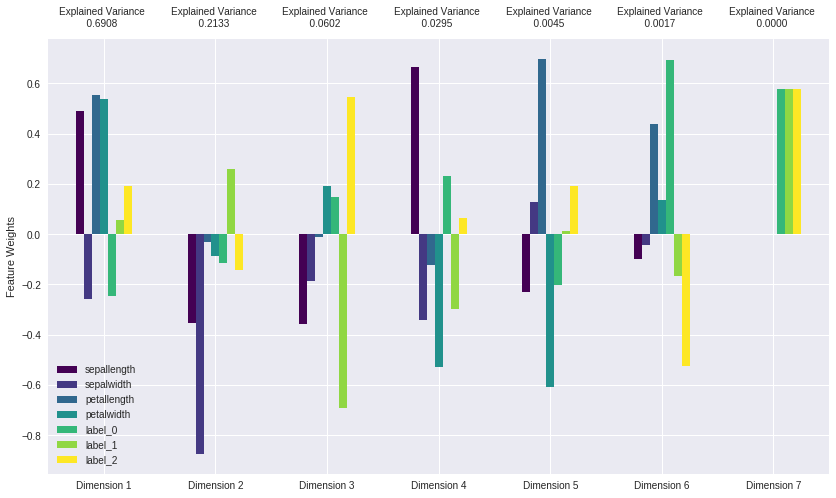

In [30]:
pca_results(df_gelman, pca_gelman)
pca_results(df_standard, pca_standard);